In [55]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
litvinenko630_real_estate_saint_petersburg_2014_2019_path = kagglehub.dataset_download('litvinenko630/real-estate-saint-petersburg-2014-2019')

print('Data source import complete.')


Data source import complete.


# Introduction | Real Estate Saint-Petersburg 2014-2019

Current dataset has been acquired from Kaggle datasets.  
It contains info about real estate listings, including various features of properties. Source:  
https://www.kaggle.com/datasets/litvinenko630/real-estate-saint-petersburg-2014-2019/data


### Goal  

Completed version of this notebook will be having a prediction baseline model able to forecast prices of real estate.

## Importing libraries, funcs & data

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv(r'data/real_estate_data.csv', sep='\t')

## Data exploration

In [58]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [60]:
df.describe().round(decimals=2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [61]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [62]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [63]:
df.duplicated().sum()

0

In [64]:
df.nunique().sort_values()

studio                     2
open_plan                  2
is_apartment               2
ponds_around3000           4
parks_around3000           4
balcony                    6
rooms                     17
floor                     33
floors_total              36
total_images              38
ceiling_height           183
locality_name            364
kitchen_area             971
parks_nearest            995
ponds_nearest           1096
days_exposition         1141
first_day_exposition    1491
living_area             1782
total_area              2182
last_price              2978
cityCenters_nearest     7642
airports_nearest        8275
dtype: int64

In [65]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [66]:
df.shape

(23699, 22)

## Data Preprocessing

In [67]:
df['last_price'].sort_values()

8793         12190.0
17456       430000.0
14911       430000.0
16274       440000.0
17676       450000.0
            ...     
15651    300000000.0
1436     330000000.0
14706    401300000.0
19540    420000000.0
12971    763000000.0
Name: last_price, Length: 23699, dtype: float64





There's an anomaly low last price that has to be corrected

In [68]:
df.query('last_price==12190.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [69]:
min_value = min(df['last_price'])
df.loc[df['last_price']==min_value, 'last_price'] = int(min_value*100)

In [70]:
df[df['ponds_nearest'].isna()][ 'ponds_around3000'].value_counts()

ponds_around3000
0.0    9071
Name: count, dtype: int64

In [71]:
df[df['parks_nearest'].isna()][ 'parks_around3000'].value_counts()

parks_around3000
0.0    10102
Name: count, dtype: int64

In [72]:
features_to_compare = ['airports_nearest', 'cityCenters_nearest']

df[features_to_compare] = df[features_to_compare].fillna(0)

In [73]:
from sklearn.metrics import pairwise_distances
def fulfill_by_closest(
        df: pd.DataFrame,
        features: list[str],
        features_to_compare: list[str]
):
    for feature in features:
        known_values = df[df[feature].notna()]
        unknown_values = df[df[feature].isna()]
        distances = pairwise_distances(unknown_values[features_to_compare], known_values[features_to_compare], metric='euclidean')
        nearest_indices = distances.argmin(axis=1)
        df.loc[df[feature].isna(), feature] = known_values.iloc[nearest_indices][feature].values

In [74]:
features_to_fill = ['parks_nearest','ponds_nearest','ponds_around3000','parks_around3000']
fulfill_by_closest(
    df = df,
    features = features_to_fill,
    features_to_compare = features_to_compare
)

In [75]:
df.dropna(subset=['locality_name'], inplace=True)

In [76]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df.loc[df['floors_total'].isna(), 'floor']

In [77]:
df = df[df['floors_total']<=37]

In [78]:
df.loc[df['balcony'].isna()==True,'balcony']=0

In [79]:
grouped = df[df['ceiling_height'].notna()].groupby(['locality_name'])

In [80]:
df['ceiling_height'] = df.groupby('locality_name')['ceiling_height'].transform(lambda x: x.fillna(x.mean()))


In [81]:
df.dropna(subset=['ceiling_height'], inplace=True)

In [82]:
df.shape

(23527, 22)

In [83]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20779
days_exposition          3154
kitchen_area             2240
living_area              1874
ponds_nearest               0
ponds_around3000            0
parks_nearest               0
parks_around3000            0
cityCenters_nearest         0
airports_nearest            0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
floor                       0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [84]:
df.loc[df['kitchen_area'].isna(),'kitchen_area'] = np.floor(df['kitchen_area'].mean())
df.loc[df['living_area'].isna(),'living_area']= np.floor(df['living_area'].mean())


In [85]:
df = df[df['total_area']>20]

In [86]:
df.shape

(23492, 22)

In [87]:
df.loc[:,'non_living_area'] = df['total_area']-(df['living_area']+df['kitchen_area'])

In [88]:
df = df[df['non_living_area']>0]

In [89]:
df.fillna(value=0, inplace=True)

In [90]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['exposition_year'] = df['first_day_exposition'].dt.year
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_day'] = df['first_day_exposition'].dt.day
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['studio'] = df['studio'].astype(int)
df['open_plan'] = df['open_plan'].astype(int)

In [91]:

df['log_last_price'] = np.log1p(df['last_price'])

## Сэмплирование

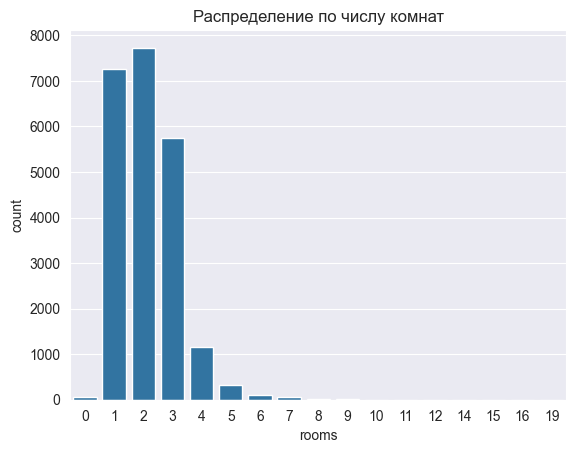

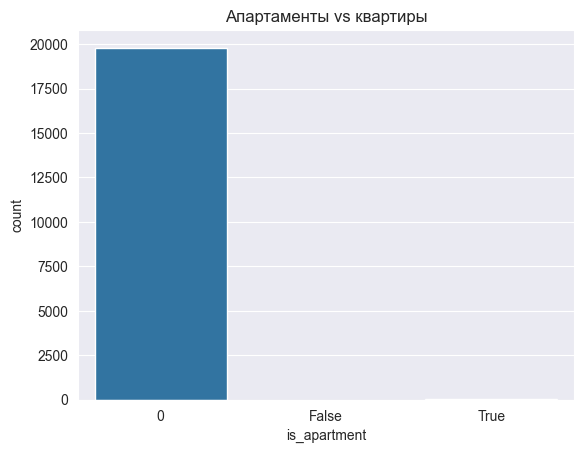

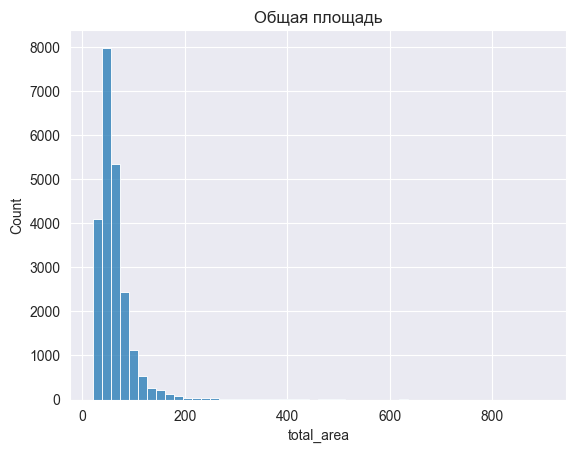

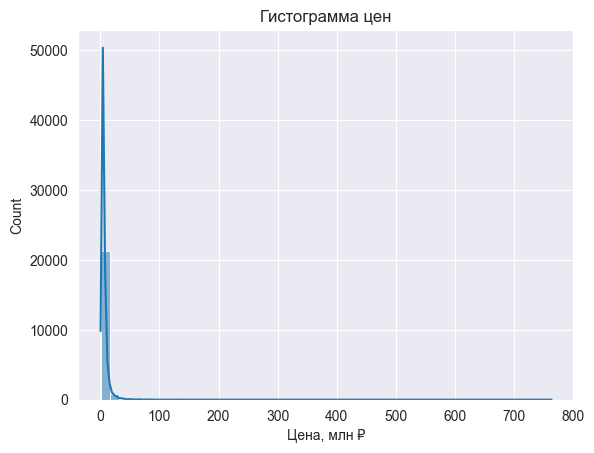

In [92]:
sns.countplot(x='rooms', data=df)
plt.title("Распределение по числу комнат")
plt.show()

sns.countplot(x='is_apartment', data=df)
plt.title("Апартаменты vs квартиры")
plt.show()

sns.histplot(df['total_area'], bins=50)
plt.title("Общая площадь")
plt.show()

sns.histplot(df['last_price'] / 1_000_000, bins=50, kde=True)
plt.xlabel("Цена, млн ₽")
plt.title("Гистограмма цен")
plt.show()

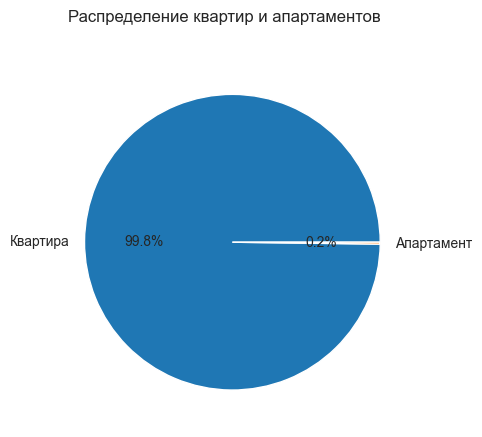

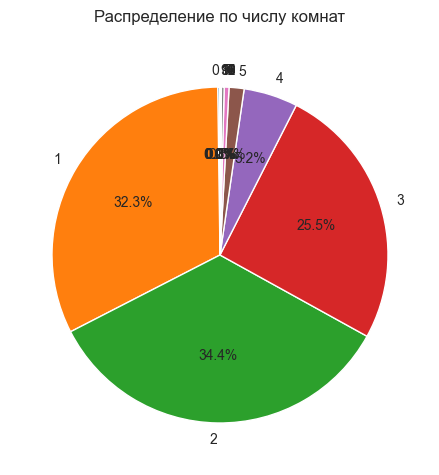

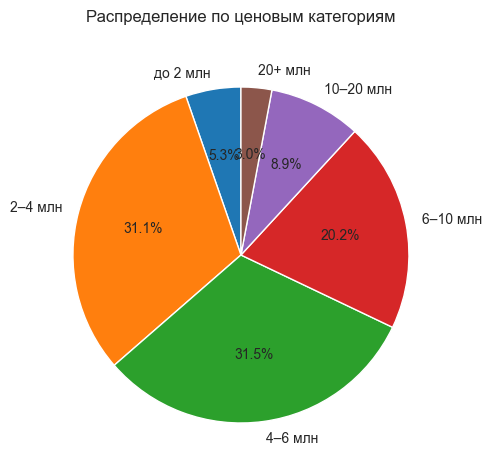

In [93]:
labels = ['Квартира', 'Апартамент']
plt.pie(df['is_apartment'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.suptitle('Распределение квартир и апартаментов')
plt.show()


room_counts = df['rooms'].value_counts().sort_index()
labels = room_counts.index.astype(str)
plt.pie(room_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.suptitle('Распределение по числу комнат')
plt.tight_layout()
plt.show()


bins = [0, 2, 4, 6, 10, 20, 100]
labels = ['до 2 млн', '2–4 млн', '4–6 млн', '6–10 млн', '10–20 млн', '20+ млн']
df['price_category'] = pd.cut(df['last_price'] / 1_000_000, bins=bins, labels=labels)
price_counts = df['price_category'].value_counts().sort_index()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=90)
plt.suptitle('Распределение по ценовым категориям')
plt.tight_layout()
plt.show()

In [94]:
apartments = df[df['is_apartment'] == 1]
df = pd.concat([df, apartments] * 5, ignore_index=True)


df_1_2 = df[df['rooms'].isin([1, 2])].groupby('rooms').apply(lambda x: x.sample(frac=0.5)).reset_index(drop=True)
df_rest = df[~df['rooms'].isin([1, 2])]
df = pd.concat([df_1_2, df_rest], ignore_index=True)


df['price_category'] = pd.cut(df['last_price'] / 1_000_000,
    bins=[0, 2, 4, 6, 10, 20, df['last_price'].max()/1_000_000],
    labels=['до 2 млн', '2–4 млн', '4–6 млн', '6–10 млн', '10–20 млн', '20+ млн']
)

expensive = df[df['price_category'].isin(['10–20 млн', '20+ млн'])]
df = pd.concat([df, expensive] * 3, ignore_index=True)

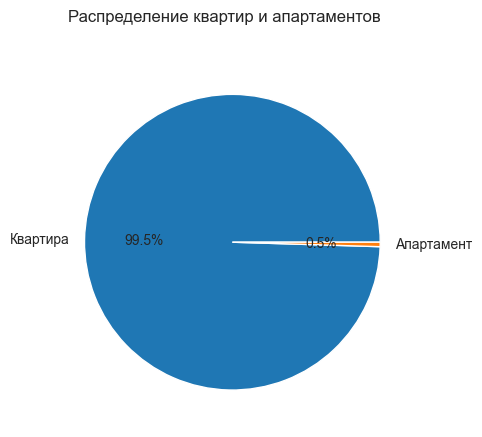

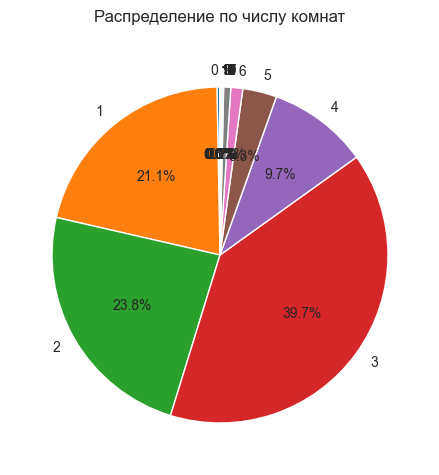

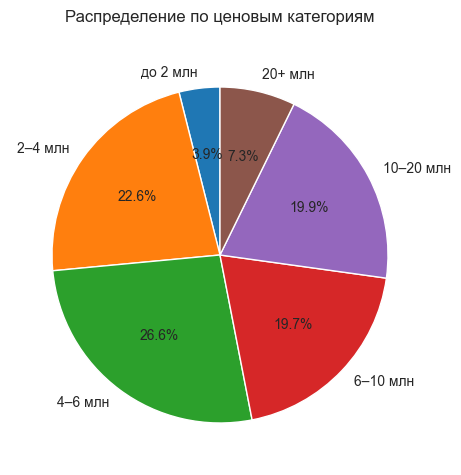

In [95]:
labels = ['Квартира', 'Апартамент']
plt.pie(df['is_apartment'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.suptitle('Распределение квартир и апартаментов')
plt.show()


room_counts = df['rooms'].value_counts().sort_index()
labels = room_counts.index.astype(str)
plt.pie(room_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.suptitle('Распределение по числу комнат')
plt.tight_layout()
plt.show()


bins = [0, 2, 4, 6, 10, 20, 100]
labels = ['до 2 млн', '2–4 млн', '4–6 млн', '6–10 млн', '10–20 млн', '20+ млн']
df['price_category'] = pd.cut(df['last_price'] / 1_000_000, bins=bins, labels=labels)
price_counts = df['price_category'].value_counts().sort_index()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=90)
plt.suptitle('Распределение по ценовым категориям')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

In [ ]:
def create_matrix_correlation(data):
    corr = data.corr()
    fig = plt.figure(figsize=(10,10))
    sns.heatmap(
        corr, annot=True, fmt='.2f',cmap='coolwarm',cbar=True
    )
    fig.tight_layout()
    plt.show()

In [ ]:
def draw_distribution_graphic(x: pd.Series)->None:
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.histplot(x, kde = True)
    ax.set_title("Target distribution", fontsize = 15, pad = 10, loc = 'left')
    ax.set_xlabel("Price - log transformed", fontsize = 8)
    ax.set_ylabel("Frequency", fontsize = 8)
    plt.show()

In [ ]:
df.head()

In [ ]:

create_matrix_correlation(df.drop(['locality_name','first_day_exposition'],axis=1))

In [ ]:
['total_area', 'rooms', 'living_area', 'is_apartment', 'kitchen_area',
       'airports_nearest', 'parks_nearest', 'non_living_area']

In [ ]:
X = df.drop(['last_price','first_day_exposition','locality_name','studio', 'open_plan','log_last_price'], axis=1)

y = df['log_last_price']

In [ ]:
draw_distribution_graphic(
    x=df.last_price
)

In [ ]:
draw_distribution_graphic(
    x=df.log_last_price
)


## Feature Selection

In [ ]:
df.isna().sum().sort_values(ascending=False)

In [ ]:

from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(
    score_func=f_classif,
    k=12
)
X_new = selector.fit_transform(X,y)

In [ ]:

X_new

In [ ]:
y

In [ ]:

selected_indices = selector.get_support(indices=True)
print("Selected feature indices:", selected_indices)

In [ ]:
selected_feature_names = X.columns[selected_indices]
print("Selected feature names:", selected_feature_names)

## Splitting Data into Train, Validation & Test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y,
    train_size = 0.8,
    test_size = 0.2
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    train_size = 0.9,
    test_size = 0.1
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Model building & training

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dataclasses import dataclass
import abc
from typing import Dict, Any, Type
from sklearn.model_selection import GridSearchCV


@dataclass
class ModelBuildingHelper:
    model_class: Type[abc.ABCMeta]
    X_train: pd.DataFrame
    X_val: pd.DataFrame
    y_train: pd.Series
    y_val: pd.Series
    test_x_data: pd.DataFrame
    test_y_data: pd.Series
    params_grid: Dict[str, Any]  = None
    bagging_params: Dict[str, Any] = None
    def __post_init__(self):
        self.model_instance = self.model_class
        if self.params_grid:
            self.grid_search = GridSearchCV(
                estimator = self.model_instance,
                param_grid =  self.params_grid,
                cv = 5
            )
        else:
            self.grid_search = None

        if self.bagging_params:
            self.bagging_model = BaggingRegressor(
                estimator=self.model_instance,
                **self.bagging_params
            )
        else:
            self.bagging_model = None

    def train_model(self):
        if self.grid_search:
            self.grid_search.fit(self.X_train, self.y_train)
            self.model_instance = self.grid_search.best_estimator_
        else:
            self.model_instance.fit(self.X_train, self.y_train)


    def evaluate_model(self):
        y_val_pred = self.model_instance.predict(self.X_val)
        self.metrics(y_real=self.y_val,
                     y_pred=y_val_pred)
    def metrics(self, y_real, y_pred):
        mae = mean_absolute_error(y_real,y_pred)
        mse = mean_squared_error(y_real, y_pred)
        r2 = r2_score(y_real, y_pred)
        print(f'metrics:\n'
              f'mae {mae}\n'
              f'mse {mse}\n'
              f'r2 {r2}\n')

    def get_prediction(self):
        test_pred_data = self.model_instance.predict(self.test_x_data)
        self.metrics(self.test_y_data, test_pred_data)
    def get_best_params(self):
        if self.grid_search:
            return self.grid_search.best_params_
        else:
            raise ValueError("GridSearchCV hasn't been completed yet")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

linear_regression = ModelBuildingHelper(
    model_class = model,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val
)

In [ ]:
linear_regression.train_model()

In [ ]:
linear_regression.evaluate_model()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
parameters = {'n_estimators': [300],
              'max_depth': [20],
              'min_samples_split': [4],
              'min_samples_leaf': [2,4]
              }

randomforest_regressor = ModelBuildingHelper(
    model_class = model,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
    params_grid=parameters,
)

In [ ]:
randomforest_regressor.train_model()

In [ ]:
randomforest_regressor.evaluate_model()

In [ ]:
randomforest_regressor.get_best_params()

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    eval_metric='rmse',
)

bagging_params = {
    'n_estimators': 5,
    'random_state': 42
}

parameters = {'n_estimators': [200,400],
              'learning_rate': [0.1],
              'max_depth': [5],
              'subsample': [1.0],
              'colsample_bytree': [0.6, 0.8],
              'alpha': [1.0],
              'lambda': [1.0],
              'min_child_weight': [6,8,10]
              }

xgb_regressor = ModelBuildingHelper(
    model_class = model,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
    params_grid=parameters,
    bagging_params=bagging_params
)


In [ ]:
xgb_regressor.train_model()

In [ ]:

xgb_regressor.evaluate_model()

In [ ]:
xgb_regressor.get_best_params()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
extra_trees_regressor = ModelBuildingHelper(
    model_class = model,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
)
extra_trees_regressor.train_model()

In [ ]:
extra_trees_regressor.evaluate_model()

In [ ]:
extra_trees_regressor.get_prediction()

In [ ]:

import lightgbm as lgb
model = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    random_state=42,
    verbose=-1
)

parameters = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'num_leaves': [20, 31],
    'min_child_samples': [10],
    'subsample': [0.6],
    'colsample_bytree': [0.6],
}

lgb_regressor = ModelBuildingHelper(
    model_class=model,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
    params_grid=parameters,
)



In [ ]:
lgb_regressor.train_model()

In [ ]:
lgb_regressor.evaluate_model()

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    random_state=42,
    verbose=0
)


In [ ]:
catboost_regressor = ModelBuildingHelper(
    model_class=model,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
)

In [ ]:
catboost_regressor.train_model()

In [ ]:
catboost_regressor.evaluate_model()

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()

parameters = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'max_iter': [1000]
}

lasso_regressor = ModelBuildingHelper(
    model_class=model,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
    params_grid=parameters
)


In [ ]:
lasso_regressor.train_model()

In [ ]:
lasso_regressor.evaluate_model()

In [ ]:
from sklearn.ensemble import StackingRegressor
base_learners = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_split=4,
        min_samples_leaf=4
    )),
    ('xgb', XGBRegressor(
        n_estimators=400,
        max_depth=5,
        alpha=1.0,
        colsample_bytree=0.6,
        min_child_weight=10,
        subsample=1.0,
        learning_rate=0.1)),
    ('cbr', CatBoostRegressor(
        iterations=500,
        depth=6,
        learning_rate=0.1,
        loss_function='RMSE',
        random_state=42,
        verbose=0
    ))
]

stacking_regressor_4 = StackingRegressor(
    estimators=base_learners,
    final_estimator=RandomForestRegressor(
        n_estimators=400)
)

stacking_model =  ModelBuildingHelper(
    model_class=stacking_regressor_4,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
)

In [ ]:
stacking_model.train_model()

In [ ]:
stacking_model.evaluate_model()

In [ ]:
base_learners = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=20,
        min_samples_split=4,
        min_samples_leaf=4
    )),
]


stacking_regressor_2 = StackingRegressor(
    estimators=base_learners,
    final_estimator=RandomForestRegressor(
        n_estimators=400)
)

stacking_model =  ModelBuildingHelper(
    model_class=stacking_regressor_2,
    X_train=X_train_scaled,
    X_val=X_test_scaled,
    y_train=y_train,
    y_val=y_test,
    test_x_data=X_val_scaled,
    test_y_data=y_val,
)


In [ ]:
stacking_model.train_model()

In [ ]:
stacking_model.evaluate_model()

## Model comparison

In [ ]:
linear_regression.get_prediction()

In [ ]:
randomforest_regressor.get_prediction()

In [ ]:
lgb_regressor.get_prediction()

In [ ]:
xgb_regressor.get_prediction()

In [ ]:
catboost_regressor.get_prediction()

In [ ]:
lasso_regressor.get_prediction()

In [ ]:
stacking_model.get_prediction()


In [ ]:
stacking_model.get_prediction()

## Conclusions

The preprocessing involved filling missing values using the nearest neighbors approach and applying  
a log transformation to normalize the last_price feature. Feature selection was done using  
SelectKBest with f_classif, retaining the top 12 features. Data was scaled with   
StandardScaler to ensure uniform contribution from all features.

After training and optimizing various models, it was found that the CatBoost Regressor delivered the best performance.   
The results were summarized as follows:  
CatBoost Regressor  
MAE: 0.160  
MSE: 0.056	  
R_2: 0.865  

CatBoost Regressor achieved the lowest MAE and MSE, and the highest R² score,  
making it the most effective model in this analysis.  
Overall, the preprocessing and feature selection steps contributed significantly  
to the model performance, and stacking models helped in leveraging the strengths of different algorithms.

To further improve the results, additional data preprocessing steps such as advanced feature  
 engineering and more extensive hyperparameter tuning techniques could be considered.